In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

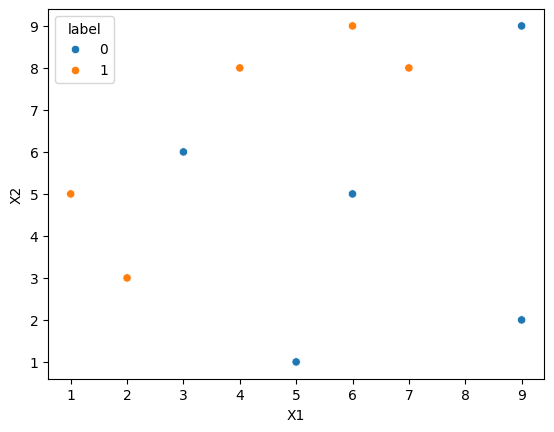

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [11]:
# Step 2 - Train 1st model
dt1.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

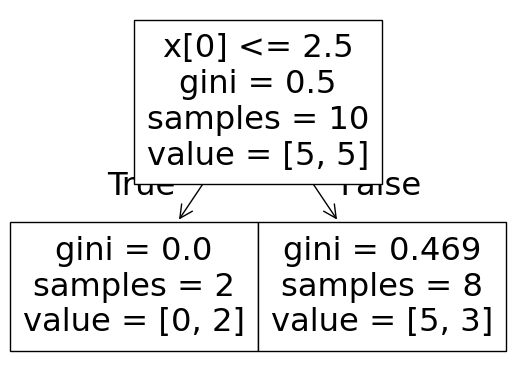

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

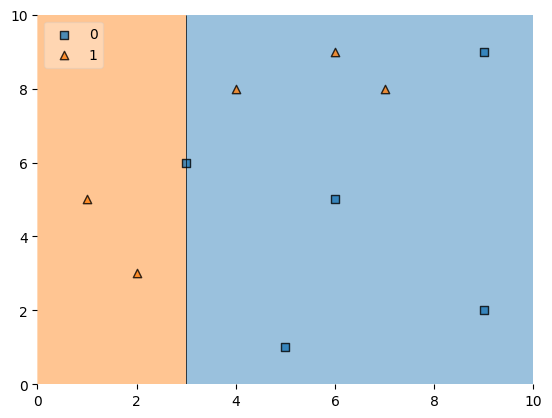

In [13]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [17]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.2)
alpha1

0.6931471805599453

In [18]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.693):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [19]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [20]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.050007
1,2,3,1,0.1,1,0.050007
2,3,6,0,0.1,0,0.050007
3,4,8,1,0.1,0,0.199971
4,5,1,0,0.1,0,0.050007
5,6,9,1,0.1,0,0.199971
6,6,5,0,0.1,0,0.050007
7,7,8,1,0.1,0,0.199971
8,9,9,0,0.1,0,0.050007
9,9,2,0,0.1,0,0.050007


In [21]:
df['updated_weights'].sum()

0.9499632151493866

In [22]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.050007,0.052641
1,2,3,1,0.1,1,0.050007,0.052641
2,3,6,0,0.1,0,0.050007,0.052641
3,4,8,1,0.1,0,0.199971,0.210503
4,5,1,0,0.1,0,0.050007,0.052641
5,6,9,1,0.1,0,0.199971,0.210503
6,6,5,0,0.1,0,0.050007,0.052641
7,7,8,1,0.1,0,0.199971,0.210503
8,9,9,0,0.1,0,0.050007,0.052641
9,9,2,0,0.1,0,0.050007,0.052641


In [24]:
df['nomalized_weights'].sum()

1.0000000000000002

In [25]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [26]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [27]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.050007,0.000000,0.052641
1,2,3,1,0.1,1,0.050007,0.052641,0.105283
2,3,6,0,0.1,0,0.050007,0.105283,0.157924
3,4,8,1,0.1,0,0.199971,0.157924,0.368428
4,5,1,0,0.1,0,0.050007,0.368428,0.421069
5,6,9,1,0.1,0,0.199971,0.421069,0.631572
6,6,5,0,0.1,0,0.050007,0.631572,0.684214
7,7,8,1,0.1,0,0.199971,0.684214,0.894717
8,9,9,0,0.1,0,0.050007,0.894717,0.947359
9,9,2,0,0.1,0,0.050007,0.947359,1.000000


In [28]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [33]:
index_values = create_new_dataset(df)

index_values

[5, 4, 5, 2, 5, 2, 5, 0, 3, 7]

In [34]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [35]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1


In [36]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [37]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [41]:
dt2.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.625, 0.5, '  False')]

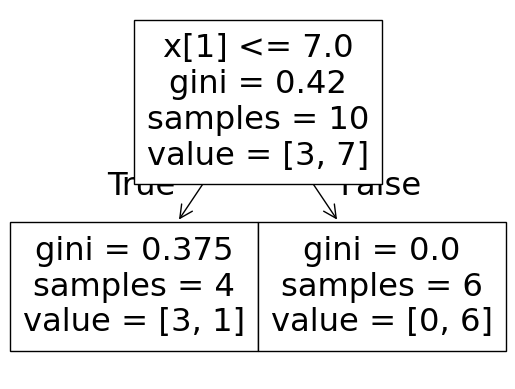

In [42]:
plot_tree(dt2)

<Axes: >

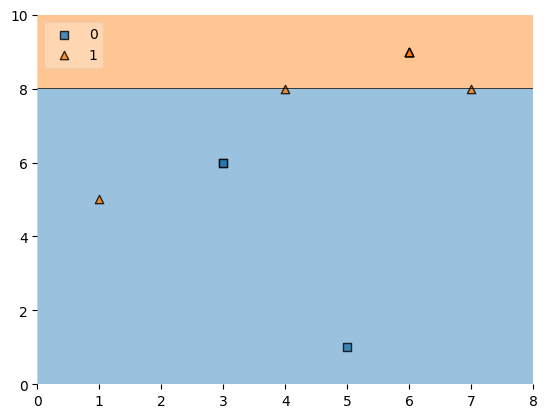

In [43]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [48]:
second_df['y_pred'] = dt2.predict(X)

In [50]:
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1


In [51]:
alpha2 = calculate_model_weight(0.1)

In [67]:
alpha2

1.0986122886681098

In [74]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [77]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [79]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,0,0.297427
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622


In [83]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [84]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,0,0.297427,0.495694
3,4,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034


In [88]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [93]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [95]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [97]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.056034,0.000000,0.056034
4,5,1,0,0.1,0,0.056034,0.056034,0.112068
5,6,9,1,0.1,1,0.056034,0.112068,0.168102
2,3,6,0,0.1,0,0.056034,0.168102,0.224136
5,6,9,1,0.1,1,0.056034,0.224136,0.280170
2,3,6,0,0.1,0,0.056034,0.280170,0.336204
5,6,9,1,0.1,1,0.056034,0.336204,0.392238
0,1,5,1,0.1,0,0.495694,0.392238,0.887932
3,4,8,1,0.1,1,0.056034,0.887932,0.943966
7,7,8,1,0.1,1,0.056034,0.943966,1.000000


In [99]:
index_values = create_new_dataset(second_df)

In [101]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [103]:
third_df

,X1,X2,label,weights
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1


In [105]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<Axes: >

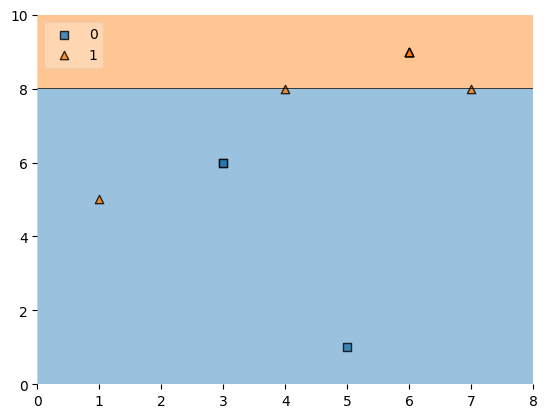

In [107]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [108]:
third_df['y_pred'] = dt3.predict(X)

In [111]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
5,6,9,1,0.1,0
2,3,6,0,0.1,1
2,3,6,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,0
2,3,6,0,0.1,1
5,6,9,1,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,1


In [113]:
alpha3 = calculate_model_weight(0.5)
alpha3

0.0

In [115]:
print(alpha1,alpha2,alpha3)

0.6931471805599453 1.0986122886681098 0.0


# Prediction

In [118]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [120]:
dt2.predict(query)

array([0], dtype=int64)

In [122]:
dt3.predict(query)

array([0], dtype=int64)

In [124]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.791759469228055

In [126]:
np.sign(1.09)

1.0

In [128]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [130]:
dt2.predict(query)

array([1], dtype=int64)

In [132]:
dt3.predict(query)

array([1], dtype=int64)

In [134]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.4054651081081645

In [138]:
np.sign(-0.25)

-1.0

## Own Class

In [137]:
class AdaBoost:
    def __init__(self, classifier, n_class):
        self.classifier = classifier
        self.n_class = n_class
        self.models = []
        self.alphas = []

    def calculate_model_weight(self, error):
        return 0.5 * np.log((1 - error) / error)

    def update_weights(self, df, alpha):
        def row_weight(row):
            if row['label'] == row['y_pred']:
                return row['weights'] * np.exp(-alpha)
            else:
                return row['weights'] * np.exp(alpha)
        df['updated_weights'] = df.apply(row_weight, axis=1)
        df['nomalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()
        df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
        df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
        return df

    def resample(self, df):
        indices = []
        for i in range(df.shape[0]):
            rand = np.random.random()
            for index, row in df.iterrows():
                if row['cumsum_lower'] < rand < row['cumsum_upper']:
                    indices.append(index)
                    break
        return df.loc[indices, ['X1', 'X2', 'label', 'weights']].reset_index(drop=True)

    def fit(self, X, y):
        df = pd.DataFrame(X).copy()
        df.columns = ['X1', 'X2']
        df['label'] = pd.Series(y).replace(0, -1)
        df['weights'] = 1 / df.shape[0]

        for i in range(self.n_class):
            clf = clone(self.classifier)
            clf.fit(df[['X1', 'X2']], df['label'])
            df['y_pred'] = clf.predict(df[['X1', 'X2']])
            error = df[df['y_pred'] != df['label']]['weights'].sum()

            if error == 0 or error >= 0.5:
                continue

            alpha = self.calculate_model_weight(error)
            self.alphas.append(alpha)
            self.models.append(clf)

            df = self.update_weights(df, alpha)
            df = self.resample(df)

    def predict(self, X):
        X = pd.DataFrame(X).copy()
        X.columns = ['X1', 'X2']
        final = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            pred = model.predict(X)
            final += alpha * pred
        return np.sign(final)


In [139]:
ad = AdaBoost(classifier=DecisionTreeClassifier(),n_class=50)

In [141]:
ad.fit(X,y)

NameError: name 'clone' is not defined

In [ ]:
x = [[3,6]]

In [ ]:
ad.predict(x)